# 신경망 시작하기

## 신경망의 구조
- 네트워크를 구성하는 __층__
- 입력 데이터와 그에 상응하는 __타깃__
- 학습에 사용할 피드백신호를 정의하는 __손실 함수__
- 합습 진행 방식을 결정하는 __옵티마이저__

### 층 : 딥러닝의 구성단위
- 하나 이상의 텐서를 입력 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 가중치 라는 층의 상태를 가짐
- 가중치는 확률적 경사 하강법에 의해 학습되는 텐서, 네트워크가 학습한 지식이 담겨있음
-


### 모델 : 층의 네트워크
- 네트워크 구조는 가설 공간을 정의
- 네트워크 구조를 선택함으로써 가능성 있는 공간(가설공가)을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한
- 이런 텐서 연산에 포함된 가중치 텐서의 좋은 값을 찾아야함

### 손실 함수와 옵티마이저
- __손실 함수__ : 훈련하는 동안 최소화될 값, 주어진 문제에 대한 성공 지표
- __옵티마이저__ : 손실 함수를 기반으로 네트워크가 어떻게 업데이트 될 지 결정, 특정 종류의 확률적 경사 하강법을 구현
여러개의 출력을 내는 신경망은 여러개의 손실함수를 가질 수 있음, 그러나 형사 하강법 과정은 하나의 스칼라 손실 값을 기준으로함. 따라서 모든 손실을 평균냄

| 문제       | 올바른 손실함수    |
|----------|-------------|
| 이진 분류 문제 | 이진 크로스엔트로피  |
| 다중 분류 문제 | 범주형 크로스엔트로피 |
| 회귀문제     | 평균제곱오차      |
| 시퀀스 학습 문제 | CTC |

### 케라스 빠르게 둘러보기
| Sequential 클래스(가장 자주 사용하는 구조인 층을 순서대로 쌓아올린 네트워크)
| keras를 import 할 지 tensorflow.keras를 import 할 지
https://89douner.tistory.com/279

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

 함수형 API를 만들면 모델이 처리할 데이터 텐서를 만들고 마치 이를 함수 처럼 텐서에 층을 적용함

In [4]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## 영화 리뷰 분류 : 이진 분류 예제

### 데이터셋 로드하기

In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

- 영어로 어떻게 바꾸는 지 보기

In [8]:
def get_decoded_review(index):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([value, key] for (key, value) in word_index.items()) # 정수 인덱스와 단어를 매핑하도록 뒤집음
    decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[index]])
    return decoded_review


In [9]:
get_decoded_review(3)

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

### 데이터 준비
- 신경망에 숫자 리스트를 주입할 수 없다 -> 텐서로 변경 필요
    - 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환, 그 다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫번째 층으로 사용
    - 리스트를 원-핫 인코딩 하여 0과 1의 벡터로 변환. 예를 들어 시퀀스 [3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10000차원의 벡터로 변환, 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용

- 두번째 방식으로 사용하기

In [10]:
# 이해안되서 프린트 찍어봄, 이따 다시 보기

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequence), dimension)이고 모든 원소가 0인 행렬 생성
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
print(x_train[10])

[0. 1. 1. ... 0. 0. 0.]


In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

- 입력데이터가 벡터이고, 레이블은 스칼라(1 또는 0)
- 이런 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전 연결층(Dense(16, activation='relu'))을 그냥 쌓은 것

### 신경망의 케라스 구현
- relu는 음수를 0으로 만드는 함수
- 시그모이드는 임의의 값을 [0, 1] 사이로 압축하므로 출력값을 확률처럼 해석할 수 있다.

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


#### 활성화 함수란?
relu와 같은 활성화 함수가 없다면 Dense 층은 선형적인 연산인 점곱과 덧셈 2개로 구성되기 때문에,
가설공간을 풍부하게 만들어 층을 깊게 만들기 위해 활성화 함수를 추가함.
relu는 딥러닝에서 가장 인기 있는 활성화 함수임

### 손실함수와 옵티마이저
이진불류 문제이고 신경망의 출력이 확률이기 때문에 binary_crossentropy 손실이 적합.
mean_squared_error도 사용할 수 있음.
확률을 출력하는 모델을 사요할 때에는 __cross_endropy__가 최선의 선택임

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 옵티마이저
- 옵티마이저의 매개변수를 변경할 경우, 옵티마이저 파이썬 클래스로 객체를 만들어 optimizer 매개변수에 전달


In [18]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

- 자신만의 손실함수, 측정함수를 전달할 경우 loss와 metrics 매개변수에 함수 객체를 전달

In [19]:
from keras import losses, metrics
model.compile(optimizer='rmsprop',
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_crossentropy])

### 검증

In [22]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 13s 344ms/step - loss: 0.5335 - accuracy: 0.7835 - val_loss: 0.4107 - val_accuracy: 0.8691
Epoch 2/20
30/30 [==============================] - 3s 78ms/step - loss: 0.3301 - accuracy: 0.8978 - val_loss: 0.3438 - val_accuracy: 0.8598
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2435 - accuracy: 0.9191 - val_loss: 0.2938 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1917 - accuracy: 0.9384 - val_loss: 0.2740 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1583 - accuracy: 0.9485 - val_loss: 0.2752 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1297 - accuracy: 0.9599 - val_loss: 0.2844 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1080 - accuracy: 0.9672 - val_loss: 0.2984 - val_accuracy: 0.8842
Epoch 8/20


In [27]:
# 클립보드 파일 저장하기
from PIL import ImageGrab   # windows only

im = ImageGrab.grabclipboard()
im.save('screenshot/batchsize_discription.png','png')   #


- batch_size = 512개 샘플씩 미니배치를 만듬
- 512개 학습할 때마다 비교, 가중치 업데이트
![](screenshot/batchsize_discription.png)

### history 객체
- model.fit() 메서드는 History객체를 반환함
- __history객체__ : 객체를 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 훈련과 검증 데이터에 대한 손실, 정확도 시각화

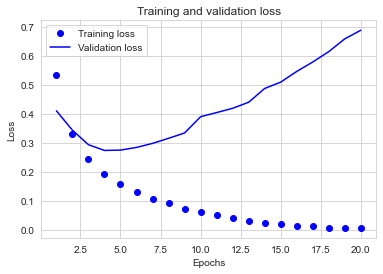

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

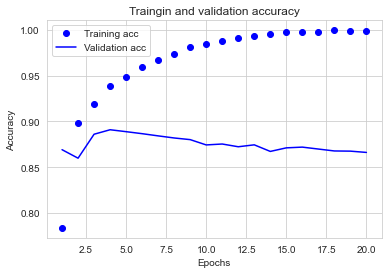

In [31]:
plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traingin and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###
- 그래프를 보면, training 데이터에 대해서 손실은 줄고, 정확도는 증가하나, 검증데이터에 대한 정확도는 감소한다. 이는 과대적합을 위미한다.

In [32]:
# 모델 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 24ms/step - loss: 0.5349 - accuracy: 0.7621
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.3046 - accuracy: 0.9020
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2221 - accuracy: 0.9242
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2902 - accuracy: 0.8848


In [33]:
results

[0.29022473096847534, 0.8848000168800354]